Añadir dropout y mas capas, diferente data augmentation 

In [ ]:

from __future__ import print_function


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers import BatchNormalization as BN
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.layers import GaussianNoise as GN
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.callbacks import LearningRateScheduler as LRS

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


from matplotlib import pyplot as pl

In [ ]:
batch_size = 512
epochs = 200
num_classes=10

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)


In [ ]:
## Data Augmentation with an ImageGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    horizontal_flip=False)

In [ ]:

## Model, note the reshape
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.2))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
##

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 1024)             0         
 se)                                                             
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [ ]:
# Early Stopping
es = EarlyStopping(
    monitor='val_loss',
    patience=100,
    verbose=1,
    mode=min
)

In [ ]:
#Checkpoint
mc = ModelCheckpoint(
    'best_m.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[es,mc],
                            verbose=2)

Epoch 1/200

Epoch 1: val_accuracy improved from -inf to 0.92820, saving model to best_m.h5
117/117 - 46s - loss: 0.4638 - accuracy: 0.8517 - val_loss: 0.2669 - val_accuracy: 0.9282 - 46s/epoch - 389ms/step
Epoch 2/200

Epoch 2: val_accuracy improved from 0.92820 to 0.96880, saving model to best_m.h5
117/117 - 42s - loss: 0.2219 - accuracy: 0.9305 - val_loss: 0.0967 - val_accuracy: 0.9688 - 42s/epoch - 359ms/step
Epoch 3/200

Epoch 3: val_accuracy did not improve from 0.96880
117/117 - 42s - loss: 0.1791 - accuracy: 0.9438 - val_loss: 0.1004 - val_accuracy: 0.9688 - 42s/epoch - 360ms/step
Epoch 4/200

Epoch 4: val_accuracy improved from 0.96880 to 0.97000, saving model to best_m.h5
117/117 - 42s - loss: 0.1547 - accuracy: 0.9510 - val_loss: 0.0939 - val_accuracy: 0.9700 - 42s/epoch - 360ms/step
Epoch 5/200

Epoch 5: val_accuracy improved from 0.97000 to 0.97480, saving model to best_m.h5
117/117 - 43s - loss: 0.1383 - accuracy: 0.9561 - val_loss: 0.0746 - val_accuracy: 0.9748 - 43s/epo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021693898364901543
Test accuracy: 0.992900013923645


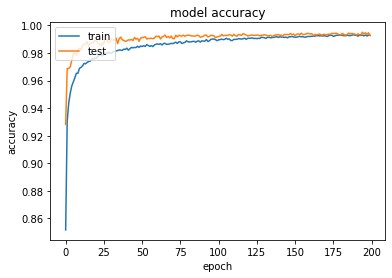

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# load the saved model
saved_model = load_model('/content/best_m.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.995
